# Sorting the contours

In [ ]:
%cd ..

## Sorting

In [210]:
from data_engineering.sorting_contours import process_contour_files

# Example usage:
contours_dir = "data/created/json/contours"
output_dir = "data/created/json/sorted_contours"
RERUN_CONTOURS = True
DOUBLE_CHECK = True
if RERUN_CONTOURS and DOUBLE_CHECK:
    process_contour_files(contours_dir, output_dir)

100%|██████████| 5200/5200 [00:05<00:00, 984.36it/s] 


## Checking the sorted contours

In [211]:
def read_sorted_contours(filepath):
    """
    Reads the sorted contours from a text file written by process_contour_files().

    Args:
        filepath: The path to the sorted contours text file.

    Returns:
        A list of lists, where each inner list represents a line of contours,
        and each contour is a list [x, y, w, h].
        Returns None if the file does not exist or if there is an error parsing the file.
    """
    try:
        with open(filepath, 'r') as f:
            lines = []
            current_line = []
            for line in f:
                line = line.strip()
                if line == "":  # Empty line indicates the end of a line of contours
                    if current_line:
                        lines.append(current_line)
                        current_line = []
                else:
                    try:
                        x, y, w, h = map(int, line.split())
                        current_line.append([x, y, w, h])
                    except ValueError:
                        print(f"Error: Could not parse line: {line} in file {filepath}")
                        return None

            # Add the last line if it exists
            if current_line:
                lines.append(current_line)

        return lines
    except FileNotFoundError:
        print(f"Error: File not found: {filepath}")
        return None

In [215]:
# read csv file 
import pandas as pd 
df = pd.read_csv('data/created/training.csv')
name = df['image_name'].values

In [216]:
name_log = list(set([log[:8] for log in name]))

In [217]:
name_log

['IMG_2271',
 'IMG_2272',
 'IMG_3955',
 'IMG_2270',
 'IMG_2266',
 'IMG_1590',
 'IMG_1587',
 'IMG_1581',
 'IMG_1591',
 'IMG_3958',
 'IMG_1589',
 'IMG_2268',
 'IMG_2274',
 'IMG_1592',
 'IMG_2273',
 'IMG_2269',
 'IMG_2267',
 'IMG_1584',
 'IMG_2265',
 'IMG_1586']

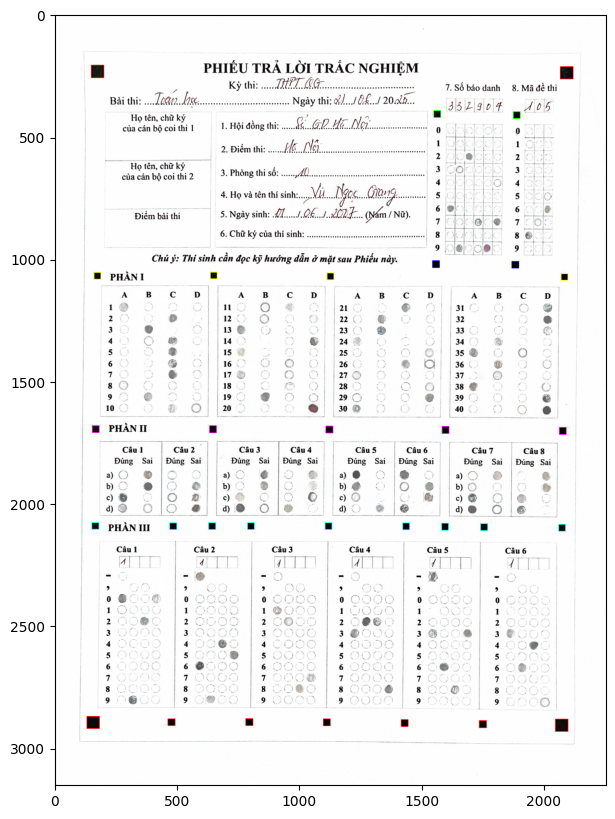

In [241]:
from matplotlib import pyplot as plt
def show_sheet(sheet):
    plt.figure(figsize=(20, 10))
    plt.imshow(sheet)
    plt.show()
    
def visualize_sorted_contours(image_path, sorted_contours_path):
    """
    Reads an image and visualizes the sorted contours on it.

    Args:
        image_path: Path to the image file.
        sorted_contours_path: Path to the sorted contours text file.
    """

    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    # Read the sorted contours
    sorted_contours = read_sorted_contours(sorted_contours_path)
    if sorted_contours is None:
        return  # Error message already printed in read_sorted_contours

    # Draw the contours on the image
    line_colors = [
        (255, 0, 0),  # Red
        (0, 255, 0),  # Green
        (0, 0, 255),  # Blue
        (255, 255, 0),  # Yellow
        (255, 0, 255),  # Magenta
        (0, 255, 255), # Cyan
    ]  # You can add more colors if needed

    for i, line in enumerate(sorted_contours):
        color = line_colors[i % len(line_colors)]  # Cycle through colors
        for contour in line:
            x, y, w, h = contour
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

    # Display the image with contours
    show_sheet(img)

name_img = name_log[19]
# Example usage:
image_path = f"data/Trainning_SET/Images/{name_img}_iter_0.jpg"  # Replace with your image path
sorted_contours_path = f"data/created/json/sorted_contours/{name_img}_iter_0_contours_sorted.txt"  # Replace with your sorted contours file path

visualize_sorted_contours(image_path, sorted_contours_path)

It works like expected!